# Problem Description – Deep Learning Hackathon on Medical Dataset 

## Problem Description: 
Following are 13 input columns for doing the prediction on heart disease. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. Please apply suitable Deep Learning algorithm to predict the target variable. 
 
## Independent Variables: 
1.	age 
2.	sex 
3.	chest pain type (4 values) 
4.	resting blood pressure 
5.	serum cholestoral in mg/dl 
6.	fasting blood sugar > 120 mg/dl 
7.	resting electrocardiographic results (values 0,1,2) 
8.	maximum heart rate achieved 
9.	exercise induced angina 
10.	oldpeak = ST depression induced by exercise relative to rest 
11.	the slope of the peak exercise ST segment 
12.	number of major vessels (0-3) colored by flourosopy 
13.	thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 
 
## Dependent Variable: 
- target  


In [1]:
import pandas as pd

In [2]:
train_dataset = pd.read_excel('MedicalData_Train.xlsx')
test_dataset = pd.read_excel('MedicalData_Test.xlsx')
all(test_dataset.columns == train_dataset.columns)

True

In [3]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       213 non-null    int64  
 1   sex       213 non-null    int64  
 2   cp        213 non-null    int64  
 3   trestbps  213 non-null    int64  
 4   chol      213 non-null    int64  
 5   fbs       213 non-null    int64  
 6   restecg   213 non-null    int64  
 7   thalach   213 non-null    int64  
 8   exang     213 non-null    int64  
 9   oldpeak   213 non-null    float64
 10  slope     213 non-null    int64  
 11  ca        213 non-null    int64  
 12  thal      213 non-null    int64  
 13  target    213 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.4 KB


In [4]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       90 non-null     int64  
 1   sex       90 non-null     int64  
 2   cp        90 non-null     int64  
 3   trestbps  90 non-null     int64  
 4   chol      90 non-null     int64  
 5   fbs       90 non-null     int64  
 6   restecg   90 non-null     int64  
 7   thalach   90 non-null     int64  
 8   exang     90 non-null     int64  
 9   oldpeak   90 non-null     float64
 10  slope     90 non-null     int64  
 11  ca        90 non-null     int64  
 12  thal      90 non-null     int64  
 13  target    0 non-null      float64
dtypes: float64(2), int64(12)
memory usage: 10.0 KB


In [5]:
train_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,53.760563,0.647887,1.056338,130.971831,247.220657,0.15493,0.553991,151.746479,0.300469,0.875587,1.478873,0.629108,2.206573,0.666667
std,8.953967,0.478754,1.040056,17.460715,52.936444,0.36269,0.525882,23.641217,0.459542,1.035805,0.603273,0.960787,0.594435,0.472515
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.00000,0.000000,139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,156.000000,0.000000,0.500000,2.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,0.00000,1.000000,169.000000,1.000000,1.500000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [6]:
test_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.0
mean,55.800000,0.766667,0.755556,133.166667,244.000000,0.133333,0.466667,144.677778,0.388889,1.427778,1.211111,0.966667,2.566667,NaN
std,9.271437,0.425322,0.986551,17.722106,49.328525,0.341839,0.523600,20.332532,0.490229,1.342397,0.608820,1.126295,0.581552,NaN
min,35.000000,0.000000,0.000000,106.000000,149.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,49.250000,1.000000,0.000000,120.000000,216.250000,0.000000,0.000000,131.000000,0.000000,0.200000,1.000000,0.000000,2.000000,NaN
50%,58.000000,1.000000,0.000000,130.000000,241.000000,0.000000,0.000000,145.500000,0.000000,1.200000,1.000000,1.000000,3.000000,NaN
75%,62.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,160.000000,1.000000,2.375000,2.000000,2.000000,3.000000,NaN
max,76.000000,1.000000,3.000000,200.000000,407.000000,1.000000,2.000000,182.000000,1.000000,6.200000,2.000000,4.000000,3.000000,NaN


# Function Definitions

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_train_log(log, to_epoch=False, from_epoch=1, title=''):
    assert (from_epoch >= 1 and (to_epoch is False or to_epoch > from_epoch)), 'invalid epoch range'
    '''plots log = {'loss':[...], 'accuracy':[...], 'val_loss':[...], 'val_accuracy':[...]}
    '''
    to_epoch = len(log['loss'])+1 if not to_epoch else to_epoch+1
    epochs = np.arange(from_epoch, to_epoch)
    from_epoch -=1
    to_epoch -= 1
    
    # following values are used to annotate the dashed lines
    val_loss_min = min(log['val_loss'][from_epoch: to_epoch])
    val_loss_mine = np.argmin(log['val_loss'][from_epoch: to_epoch]) + from_epoch
    val_accuracy_max = max(log['val_accuracy'][from_epoch: to_epoch])
    val_accuracy_maxe = np.argmax(log['val_accuracy'][from_epoch: to_epoch]) + from_epoch    
    
    fig, axes = plt.subplots(1,2, figsize=(14, 4))
    axes[0].plot(epochs, log['loss'][from_epoch: to_epoch], label='train')
    axes[0].plot(epochs, log['val_loss'][from_epoch: to_epoch], label='validation', alpha=0.8)
    
    axes[0].axhline(y=val_loss_min, color='g', alpha=0.4, linestyle='--')
    axes[0].text(epochs[-1], val_loss_min, round(val_loss_min, 2), weight='bold',
                 color='w', backgroundcolor='g', size='smaller')
    axes[0].axvline(x=val_loss_mine, color='y', alpha=0.4, linestyle='--')
    ypos = max(np.max(log['val_loss'][from_epoch: to_epoch]), np.max(log['loss'][from_epoch: to_epoch]))
    axes[0].text(val_loss_mine, ypos, val_loss_mine, weight='bold',
                 color='w', backgroundcolor='y', size='smaller')
    
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('loss')
    axes[0].legend()
    axes[1].plot(epochs, log['accuracy'][from_epoch: to_epoch], label='train')
    axes[1].plot(epochs, log['val_accuracy'][from_epoch: to_epoch], label='validation', alpha=0.8)
    
    axes[1].axhline(y=val_accuracy_max, color='g', alpha=0.4, linestyle='--')
    axes[1].text(epochs[-1], val_accuracy_max, round(val_accuracy_max, 2), weight='bold',
                 color='w', backgroundcolor='g', size='smaller')
    axes[1].axvline(x=val_accuracy_maxe, color='y', alpha=0.4, linestyle='--')
    ypos = max(np.max(log['val_accuracy'][from_epoch: to_epoch]), np.max(log['accuracy'][from_epoch: to_epoch]))
    axes[1].text(val_accuracy_maxe, ypos, val_accuracy_maxe, weight='bold',
                 color='w', backgroundcolor='y', size='smaller')
    
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('accuracy')
    axes[1].legend()
    fig.suptitle(title)
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

features = train_dataset.columns.drop('target')
X_test = test_dataset[features]

X_train, X_valid, y_train, y_valid = train_test_split(train_dataset[features], 
                                                      train_dataset['target'], 
                                                      test_size=0.2, 
                                                      random_state=7)

# Traditional Models

In [9]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Transform & Train
# model = make_pipeline(StandardScaler(), SVC())
# model = make_pipeline(StandardScaler(), PolynomialFeatures(3), LogisticRegression())
model = make_pipeline(RandomForestClassifier())

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

# Evaluate
from sklearn.metrics import accuracy_score

print('accuracy=', accuracy_score(y_pred=y_pred, y_true=y_valid))

accuracy= 0.813953488372093


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model, 
                X=train_dataset[features], 
                y=train_dataset['target'], 
                cv=5, 
                scoring='accuracy')

print('Mean accuracy:', np.mean(scores))
print('Standard deviation:', np.std(scores))

Mean accuracy: 0.8305647840531561
Standard deviation: 0.05998495044939464


In [11]:
model.fit(train_dataset[features], train_dataset['target'])
y_pred = model.predict(X_test)
test_dataset['target'] = y_pred
test_dataset.to_csv('Submission_Medical_900802.csv')

# Deep Learning

In [147]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

fd = len(features)
model = Sequential()
model.add(Dense(fd, input_dim=fd, activation='relu'))
model.add(Dense(fd, activation='relu'))
# model.add(Dense(fd * 4, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_24 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


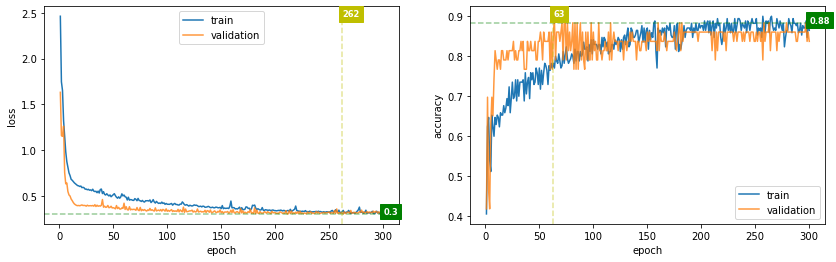

2/2 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8372
Validation loss: 0.3191904127597809
Validation accuracy: 0.8372092843055725
Wall time: 13.6 s


In [148]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300, verbose=0)
plot_train_log(history.history)
score = model.evaluate(X_valid, y_valid)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])